In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
!pip install PyWavelets

In [7]:
import cv2

In [8]:
#Loading Dataset:
!pip install -q kaggle


In [9]:
#move the zip file to my google drive
#first mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!unzip /content/drive/MyDrive/temp/V2.zip -d dataset/

Archive:  /content/drive/MyDrive/temp/V2.zip
   creating: dataset/V2/
   creating: dataset/V2/Annotations/
  inflating: dataset/V2/Annotations/scene00022.png  
  inflating: dataset/V2/Annotations/scene00023.png  
  inflating: dataset/V2/Annotations/scene00024.png  
  inflating: dataset/V2/Annotations/scene00025.png  
  inflating: dataset/V2/Annotations/scene00026.png  
  inflating: dataset/V2/Annotations/scene00027.png  
  inflating: dataset/V2/Annotations/scene00028.png  
  inflating: dataset/V2/Annotations/scene00029.png  
  inflating: dataset/V2/Annotations/scene00030.png  
  inflating: dataset/V2/Annotations/scene00031.png  
  inflating: dataset/V2/Annotations/scene00032.png  
  inflating: dataset/V2/Annotations/scene00033.png  
  inflating: dataset/V2/Annotations/scene00034.png  
  inflating: dataset/V2/Annotations/scene00035.png  
  inflating: dataset/V2/Annotations/scene00036.png  
  inflating: dataset/V2/Annotations/scene00037.png  
  inflating: dataset/V2/Annotations/scene0003

Make proper accurate splits of data

In [11]:
#convert all the segmented images into black and white
import cv2
import os
import numpy as np

def convert_annotations(input_folder, output_folder):
    """
    Convert pink annotations to binary (black and white) masks
    """
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process each image in the folder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Read image
            img_path = os.path.join(input_folder, filename)
            img = cv2.imread(img_path)

            # Convert to binary mask
            # Convert to grayscale first
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Threshold to create binary image
            # Assuming pink regions are significantly different from black background
            _, binary = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

            # Save the binary mask
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, binary)

# Usage
input_folder = "/content/dataset/V2/Annotations"
output_folder = "/content/dataset/V2/AnnotationsWB"
convert_annotations(input_folder, output_folder)

In [12]:
mkdir '/content/dataset/test/masks'

mkdir: cannot create directory ‘/content/dataset/test/masks’: No such file or directory


In [13]:
mkdir '/content/dataset/test/Images'

mkdir: cannot create directory ‘/content/dataset/test/Images’: No such file or directory


In [14]:
import os
import shutil
import random

# Assuming the previous code has already been executed, and the following directories are set up:
IMAGE_PATH = '/content/dataset/V2/Images/'
MASK_PATH = '/content/dataset/V2/AnnotationsWB'
TEST_PATH = '/content/dataset/test/Images'

# Create the test directory if it doesn't exist
os.makedirs(TEST_PATH, exist_ok=True)

# Get all image filenames
all_images = sorted([f for f in os.listdir(IMAGE_PATH) if f.endswith('.jpeg')])

# Calculate 10% for the test split
num_test = int(len(all_images) * 0.1)

# Randomly select 10% of the dataset for testing
test_indices = random.sample(range(len(all_images)), num_test)

# Move selected images to the test directory
for idx in test_indices:
    src = os.path.join(IMAGE_PATH, all_images[idx])
    dst = os.path.join(TEST_PATH, all_images[idx])
    shutil.move(src, dst)

print(f"Moved {num_test} images to the test directory: {TEST_PATH}")

# Check the number of files in the test directory
print("Number of files in the test directory: " + str(len(os.listdir(TEST_PATH))))

Moved 12 images to the test directory: /content/dataset/test/Images
Number of files in the test directory: 12


In [15]:
# Create the test_masks directory if it doesn't exist
TEST_MASKS_PATH = '/content/dataset/test/masks/'
os.makedirs(TEST_MASKS_PATH, exist_ok=True)

# Move corresponding masks to the test_masks directory
for idx in test_indices:
    # Get the filename of the image that was moved
    image_filename = all_images[idx]

    # The mask filename is the same as the image filename
    mask_filename = image_filename  # No changes needed to the filename
    mask_filename = os.path.splitext(image_filename)[0] + ".png"
    src_mask = os.path.join(MASK_PATH, mask_filename)

    # Print debug information
    print(f"Checking for mask: {mask_filename}")
    print(f"Source mask path: {src_mask}")

    # Check if the corresponding mask exists before moving
    if os.path.exists(src_mask):
        dst_mask = os.path.join(TEST_MASKS_PATH, mask_filename)
        shutil.move(src_mask, dst_mask)
    else:
        print(f"Mask not found for image: {image_filename}")

# Check the number of files in the test_masks directory
print("Number of masks in the test_masks directory: " + str(len(os.listdir(TEST_MASKS_PATH))))

Checking for mask: scene00050.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00050.png
Checking for mask: scene00080.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00080.png
Checking for mask: scene00097.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00097.png
Checking for mask: scene00127.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00127.png
Checking for mask: scene00032.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00032.png
Checking for mask: scene00078.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00078.png
Checking for mask: scene00087.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00087.png
Checking for mask: scene00044.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00044.png
Checking for mask: scene00109.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00109.png
Checking for mask: scene00038.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene

In [16]:
print("Number of files in the mask directory: " + str(len(os.listdir(MASK_PATH))))
print("Number of files in the train_image directory: " + str(len(os.listdir(IMAGE_PATH))))

Number of files in the mask directory: 116
Number of files in the train_image directory: 116


In [17]:
print("Number of files in the mask directory: " + str(len(os.listdir(TEST_PATH))))
print("Number of files in the train_image directory: " + str(len(os.listdir(TEST_MASKS_PATH))))

Number of files in the mask directory: 12
Number of files in the train_image directory: 12


In [18]:
import os
from PIL import Image

def convert_png_to_jpeg(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            try:
                img = Image.open(os.path.join(directory, filename))
                # Convert image to RGB mode if it's not already
                if img.mode != 'RGB':
                    img = img.convert('RGB')
                new_filename = os.path.splitext(filename)[0] + ".jpeg"
                img.save(os.path.join(directory, new_filename), "JPEG")
                os.remove(os.path.join(directory, filename))  # Remove the original PNG file
                print(f"Converted {filename} to {new_filename}")
            except Exception as e:
                print(f"Error converting {filename}: {e}")


convert_png_to_jpeg("/content/dataset/V2/AnnotationsWB")
convert_png_to_jpeg("/content/dataset/test/masks")

Converted scene00146.png to scene00146.jpeg
Converted scene00103.png to scene00103.jpeg
Converted scene00149.png to scene00149.jpeg
Converted scene00058.png to scene00058.jpeg
Converted scene00040.png to scene00040.jpeg
Converted scene00046.png to scene00046.jpeg
Converted scene00113.png to scene00113.jpeg
Converted scene00116.png to scene00116.jpeg
Converted scene00045.png to scene00045.jpeg
Converted scene00129.png to scene00129.jpeg
Converted scene00093.png to scene00093.jpeg
Converted scene00041.png to scene00041.jpeg
Converted scene00138.png to scene00138.jpeg
Converted scene00134.png to scene00134.jpeg
Converted scene00100.png to scene00100.jpeg
Converted scene00084.png to scene00084.jpeg
Converted scene00091.png to scene00091.jpeg
Converted scene00130.png to scene00130.jpeg
Converted scene00066.png to scene00066.jpeg
Converted scene00148.png to scene00148.jpeg
Converted scene00125.png to scene00125.jpeg
Converted scene00054.png to scene00054.jpeg
Converted scene00144.png to scen

Testing PyWavelet Transformations

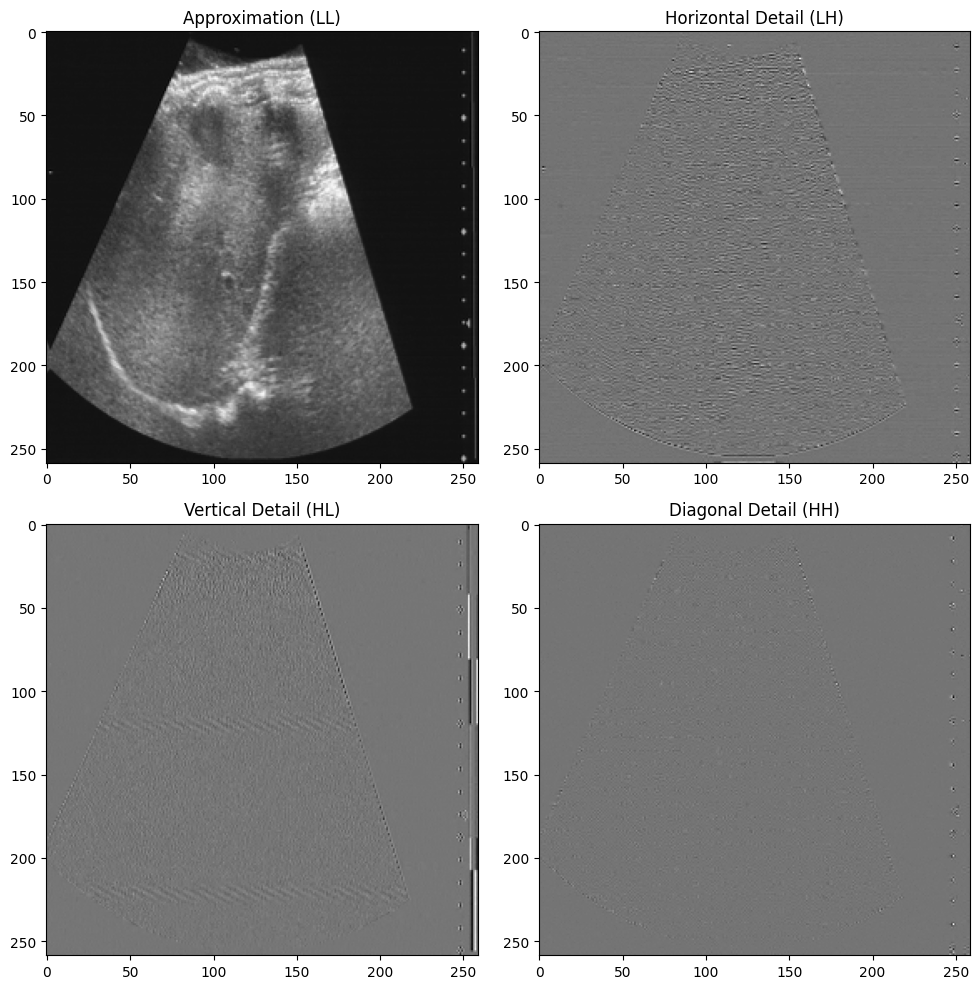

In [20]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Function to load and preprocess image
def load_image(image_path):
    # Load the image in grayscale mode
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    img = cv2.resize(img, (512,512))

    # Normalize the image data (optional but helps with numerical stability)
    img = img / 255.0

    return img

# Function to perform 2D wavelet transform and plot components
def perform_wavelet_transform(image):
    # Perform 2D Discrete Wavelet Transform using the Daubechies 4 (db4) wavelet
    coeffs2 = pywt.dwt2(image, 'db4')

    # The result of dwt2 is a tuple containing (LL, (LH, HL, HH))
    LL, (LH, HL, HH) = coeffs2

    # Plot the original and transformed coefficients
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(LL, cmap='gray')
    plt.title('Approximation (LL)')

    plt.subplot(2, 2, 2)
    plt.imshow(LH, cmap='gray')
    plt.title('Horizontal Detail (LH)')

    plt.subplot(2, 2, 3)
    plt.imshow(HL, cmap='gray')
    plt.title('Vertical Detail (HL)')

    plt.subplot(2, 2, 4)
    plt.imshow(HH, cmap='gray')
    plt.title('Diagonal Detail (HH)')

    plt.tight_layout()
    plt.show()

image_path = '/content/dataset/V2/Images/scene00022.jpeg'

image = load_image(image_path)

perform_wavelet_transform(image)

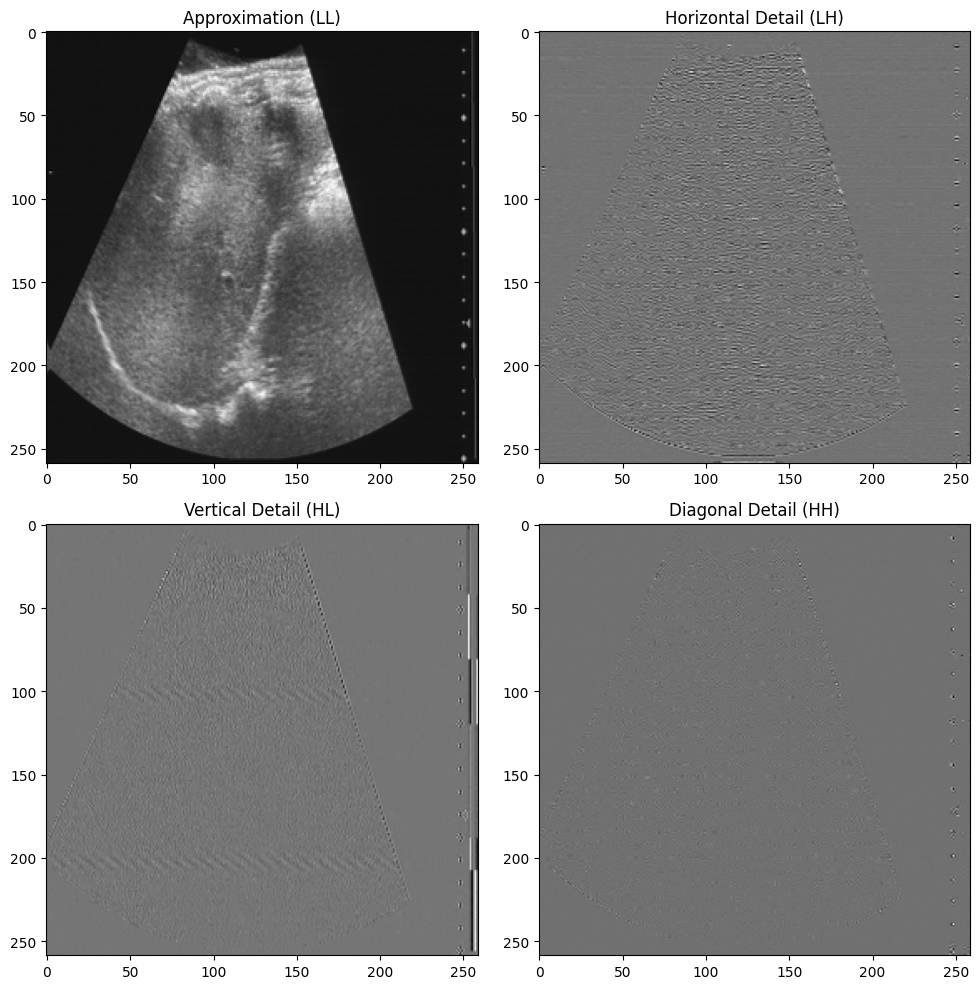

In [21]:
# Test images in our dataset
image_path = '/content/dataset/V2/Images/scene00023.jpeg'

# Load the image
image = load_image(image_path)

# Perform wavelet transform and plot the components
perform_wavelet_transform(image)

INterRouted Method:

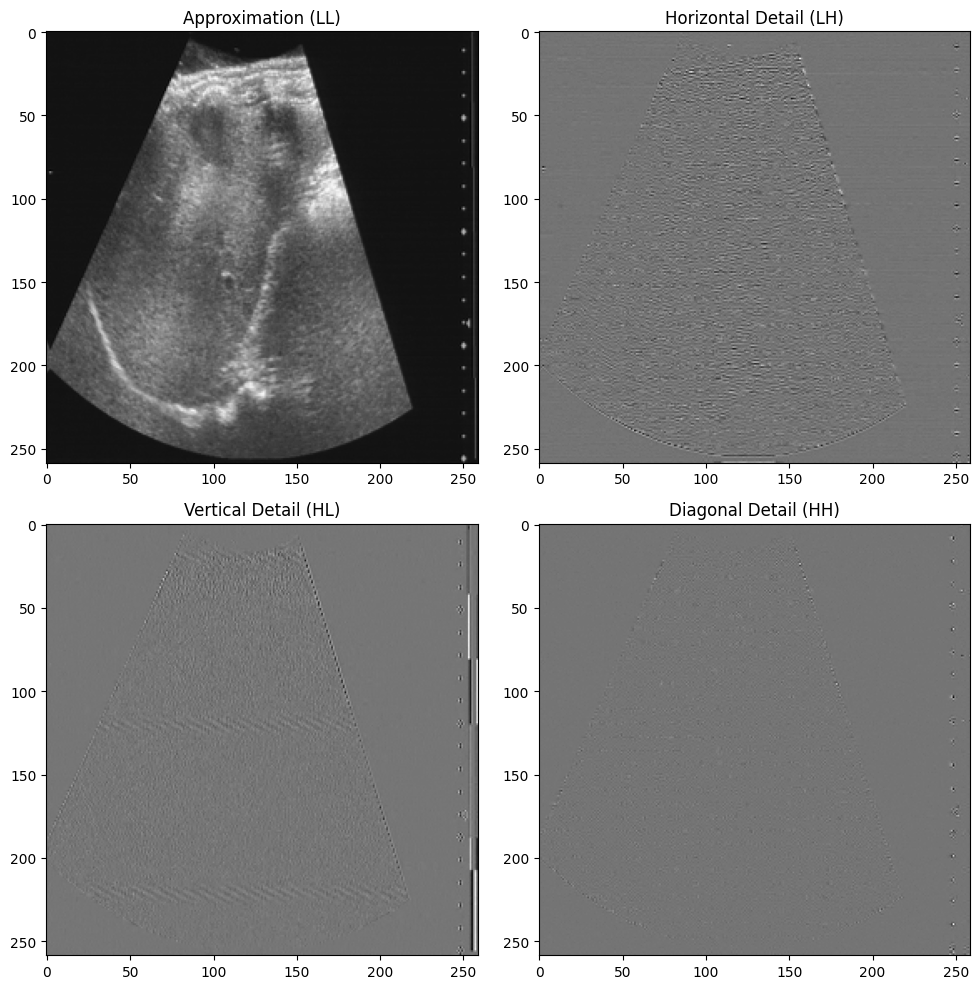

In [35]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Function to load and preprocess image
def load_image(image_path):
    # Load the image in grayscale mode
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    img = cv2.resize(img, (512,512))

    # Normalize the image data (optional but helps with numerical stability)
    img = img / 255.0

    return img

# Function to perform 2D wavelet transform and plot components
def perform_wavelet_transform(image):
    # Perform 2D Discrete Wavelet Transform using the Daubechies 4 (db4) wavelet
    coeffs2 = pywt.dwt2(image, 'db4')

    # The result of dwt2 is a tuple containing (LL, (LH, HL, HH))
    LL, (LH, HL, HH) = coeffs2

    # Plot the original and transformed coefficients
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(LL, cmap='gray')
    plt.title('Approximation (LL)')

    plt.subplot(2, 2, 2)
    plt.imshow(LH, cmap='gray')
    plt.title('Horizontal Detail (LH)')

    plt.subplot(2, 2, 3)
    plt.imshow(HL, cmap='gray')
    plt.title('Vertical Detail (HL)')

    plt.subplot(2, 2, 4)
    plt.imshow(HH, cmap='gray')
    plt.title('Diagonal Detail (HH)')

    plt.tight_layout()
    plt.show()

image_path = '/content/dataset/V2/Images/scene00022.jpeg'

image = load_image(image_path)

perform_wavelet_transform(image)

In [36]:
import os
import numpy as np
import pywt
import cv2
import tensorflow as tf

class WaveletDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_folder, mask_folder, file_list, batch_size, image_size=(512,512), wavelet='db4'):
        self.image_folder = image_folder
        self.mask_folder = mask_folder
        self.file_list = file_list
        self.batch_size = batch_size
        self.image_size = image_size
        self.wavelet = wavelet

    def __len__(self):
        return int(np.ceil(len(self.file_list) / self.batch_size))

    def __getitem__(self, index):
        batch_files = self.file_list[index * self.batch_size:(index + 1) * self.batch_size]

        images = np.zeros((len(batch_files), self.image_size[0], self.image_size[1], 4))
        masks = np.zeros((len(batch_files), self.image_size[0], self.image_size[1], 1))

        for i, filename in enumerate(batch_files):
            img_path = os.path.join(self.image_folder, filename)
            mask_path = os.path.join(self.mask_folder, filename)

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                raise ValueError(f"Error loading image from {img_path}")
            img = cv2.resize(img, self.image_size) / 255.0

            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            if mask is None:
                raise ValueError(f"Error loading mask from {mask_path}")
            mask = cv2.resize(mask, self.image_size) / 255.0
            mask = np.expand_dims(mask, axis=-1)

            coeffs2 = pywt.dwt2(img, self.wavelet)
            LL, (LH, HL, HH) = coeffs2

            wavelet_image = np.stack([LL, LH, HL, HH], axis=-1)
            wavelet_image = cv2.resize(wavelet_image, self.image_size)

            images[i] = wavelet_image
            masks[i] = mask

        return images, masks

**UNet Model**

In [37]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model

def conv_block(input_tensor, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def encoder_block(input_tensor, num_filters):
    x = conv_block(input_tensor, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

def decoder_block(input_tensor, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input_tensor)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="U-Net")
    return model

# Modify input shape to (512,512, 4) for wavelet-transformed images
model = build_unet((512,512,4))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
# Print the model summary to confirm the architecture
model.summary()
batch_size=4

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 512, 512, 4)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_57 (Conv2D)        │ (None, 512, 512, 64)   │          2,368 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_54    │ (None, 512, 512, 64)   │            256 │ conv2d_57[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_54             │ (None, 512, 512, 64)   │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_58 (Conv2D)        │ (None, 512, 512, 64)   │         36,928 │ activation_54[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_55    │ (None, 512, 512, 64)   │            256 │ conv2d_58[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_55             │ (None, 512, 512, 64)   │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_12          │ (None, 256, 256, 64)   │              0 │ activation_55[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_59 (Conv2D)        │ (None, 256, 256, 128)  │         73,856 │ max_pooling2d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_56    │ (None, 256, 256, 128)  │            512 │ conv2d_59[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_56             │ (None, 256, 256, 128)  │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_60 (Conv2D)        │ (None, 256, 256, 128)  │        147,584 │ activation_56[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_57    │ (None, 256, 256, 128)  │            512 │ conv2d_60[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_57             │ (None, 256, 256, 128)  │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_13     

 Total params: 31,055,873 (118.47 MB)

 Trainable params: 31,044,097 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [39]:
from tensorflow.keras import backend as K

def dice_loss(y_true, y_pred):
    smooth = 1e-6
    intersection = K.sum(y_true * y_pred)
    return 1 - (2. * intersection + smooth) / (K.sum(y_true) + K.sum(y_pred) + smooth)

model.compile(optimizer=optimizer, loss=dice_loss, metrics=['accuracy'])

In [48]:
!mkdir /content/dataset/V2/Imagespng

In [49]:
import os
from PIL import Image

# Define paths
jpeg_folder = "/content/dataset/V2/Images/"  # Replace with your folder containing .jpeg files
png_folder = "/content/dataset/V2/Imagespng"   # Replace with your desired output folder for .png files

# Create output folder if it doesn't exist
os.makedirs(png_folder, exist_ok=True)

# Loop through all files in the .jpeg folder
for file_name in os.listdir(jpeg_folder):
    if file_name.endswith(".jpeg") or file_name.endswith(".jpg"):
        # Open the .jpeg file
        jpeg_path = os.path.join(jpeg_folder, file_name)
        image = Image.open(jpeg_path)

        # Save as .png
        png_path = os.path.join(png_folder, file_name.rsplit(".", 1)[0] + ".png")
        image.save(png_path, format="PNG", optimize=True)  # Save without losing data
        print(f"Converted: {jpeg_path} -> {png_path}")

print("All files converted successfully.")


Converted: /content/dataset/V2/Images/scene00058.jpeg -> /content/dataset/V2/Imagespng/scene00058.png
Converted: /content/dataset/V2/Images/scene00043.jpeg -> /content/dataset/V2/Imagespng/scene00043.png
Converted: /content/dataset/V2/Images/scene00067.jpeg -> /content/dataset/V2/Imagespng/scene00067.png
Converted: /content/dataset/V2/Images/scene00071.jpeg -> /content/dataset/V2/Imagespng/scene00071.png
Converted: /content/dataset/V2/Images/scene00072.jpeg -> /content/dataset/V2/Imagespng/scene00072.png
Converted: /content/dataset/V2/Images/scene00096.jpeg -> /content/dataset/V2/Imagespng/scene00096.png
Converted: /content/dataset/V2/Images/scene00052.jpeg -> /content/dataset/V2/Imagespng/scene00052.png
Converted: /content/dataset/V2/Images/scene00135.jpeg -> /content/dataset/V2/Imagespng/scene00135.png
Converted: /content/dataset/V2/Images/scene00056.jpeg -> /content/dataset/V2/Imagespng/scene00056.png
Converted: /content/dataset/V2/Images/scene00116.jpeg -> /content/dataset/V2/Image

In [52]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

IMAGE_PATH="/content/dataset/V2/Imagespng"
MASK_PATH="/content/dataset/V2/Annotations"

# Split data
image_files = os.listdir(IMAGE_PATH)
train_files, val_files = train_test_split(image_files, test_size=0.1, random_state=42)

train_data_gen = WaveletDataGenerator(
    image_folder=IMAGE_PATH,
    mask_folder=MASK_PATH,
    file_list=train_files,
    batch_size=batch_size
)

val_data_gen = WaveletDataGenerator(
    image_folder=IMAGE_PATH,
    mask_folder=MASK_PATH,
    file_list=val_files,
    batch_size=batch_size
)

In [56]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True)

history = model.fit(
    train_data_gen,
    validation_data=val_data_gen,
    epochs=25,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

model.save("pywaveletLiver.h5")

Epoch 1/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7412 - loss: 0.3921 - val_accuracy: 0.7334 - val_loss: 0.9274 - learning_rate: 5.0000e-05
Epoch 2/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 972ms/step - accuracy: 0.7402 - loss: 0.3903 - val_accuracy: 0.7291 - val_loss: 0.9385 - learning_rate: 5.0000e-05
Epoch 3/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 26s 968ms/step - accuracy: 0.7401 - loss: 0.3885 - val_accuracy: 0.7381 - val_loss: 0.9441 - learning_rate: 5.0000e-05
Epoch 4/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 26s 961ms/step - accuracy: 0.7402 - loss: 0.3871 - val_accuracy: 0.7098 - val_loss: 0.9509 - learning_rate: 5.0000e-05
Epoch 5/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 981ms/step - accuracy: 0.7396 - loss: 0.3863 - val_accuracy: 0.5610 - val_loss: 0.9382 - learning_rate: 5.0000e-05
Epoch 6/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7407 - loss: 0.3848 - val_accuracy: 0.5818 - val_loss: 0.9203 - learning_rate: 5.0000e-05
Epoch 7/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 26s 951ms/step - accuracy:

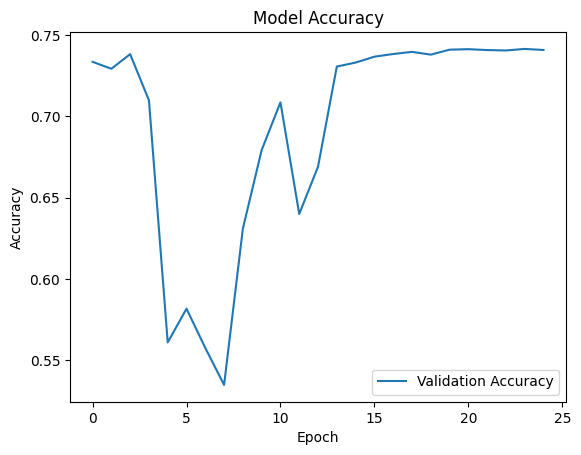

In [57]:
# Train the model for
# Plotting training accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Preprocessed image shape: (1, 512, 512, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


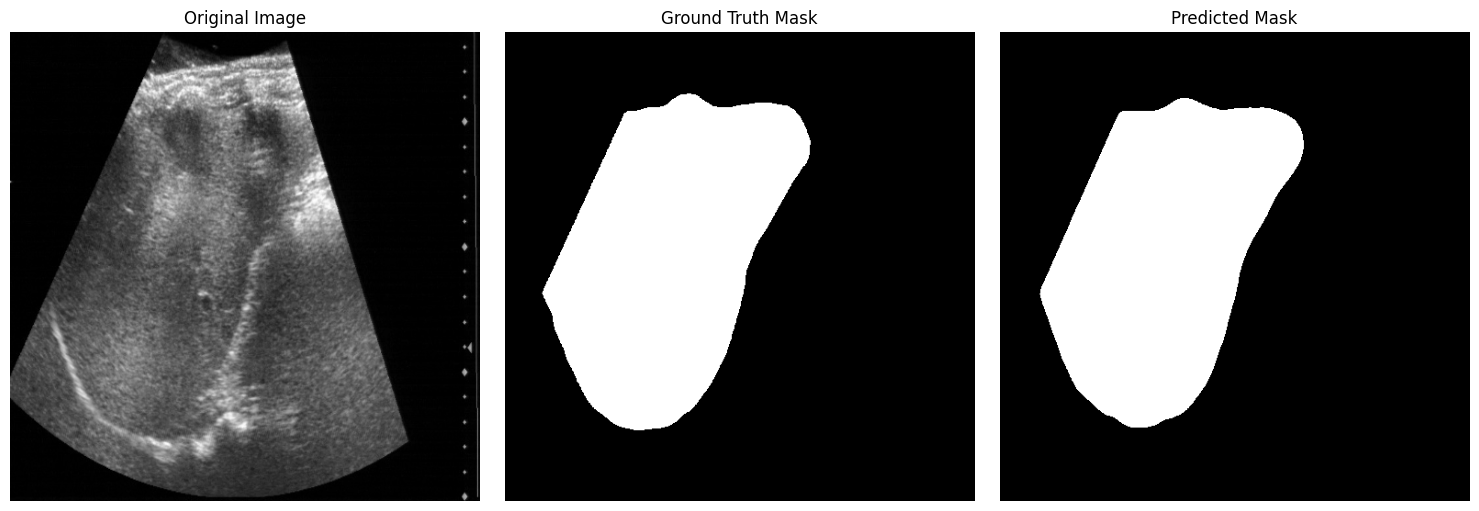

Accuracy: 0.9917
F1 Score: 0.9835


In [58]:
import numpy as np
import cv2
import os
import pywt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score
def load_and_preprocess_image(image_path, wavelet='db4', image_size=(512,512)):
    if not os.path.exists(image_path):
        raise ValueError(f"Image not found: {image_path}")

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image could not be loaded: {image_path}")

    img_resized = cv2.resize(img, image_size) / 255.0

    coeffs2 = pywt.dwt2(img_resized, wavelet)

    if coeffs2 is None or len(coeffs2) != 2:
        raise ValueError("Wavelet transformation failed to produce coefficients.")

    LL, (LH, HL, HH) = coeffs2

    LL = cv2.resize(LL, image_size)
    LH = cv2.resize(LH, image_size)
    HL = cv2.resize(HL, image_size)
    HH = cv2.resize(HH, image_size)

    wavelet_image = np.stack([LL, LH, HL, HH], axis=-1)

    return img_resized, wavelet_image


# Load and preprocess the image
image_path = "/content/dataset/V2/Images/scene00022.jpeg"  # Replace with your actual image path
mask_path = "/content/dataset/V2/AnnotationsWB/scene00022.jpeg" # Replace with your actual mask path



def load_ground_truth_mask(mask_path, image_size=(512, 512)):
    if not os.path.exists(mask_path):
        raise ValueError(f"Ground truth mask not found: {mask_path}")

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        raise ValueError(f"Ground truth mask could not be loaded: {mask_path}")

    mask_resized = cv2.resize(mask, image_size)
    # Ensure the mask is binary
    mask_binary = (mask_resized > 127).astype(np.uint8)
    return mask_binary

original_image, preprocessed_image = load_and_preprocess_image(image_path)
ground_truth_mask = load_ground_truth_mask(mask_path)

# Add a batch dimension for model prediction
preprocessed_image_batch = np.expand_dims(preprocessed_image, axis=0)

print(f"Preprocessed image shape: {preprocessed_image_batch.shape}")

# Make prediction
predicted_mask = model.predict(preprocessed_image_batch)

# Ensure the predicted mask is binary
predicted_mask_binary = (predicted_mask > 0.5).astype(np.uint8)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(ground_truth_mask, cmap='gray')
axes[1].set_title('Ground Truth Mask')
axes[1].axis('off')

axes[2].imshow(predicted_mask_binary[0, :, :, 0], cmap='gray')
axes[2].set_title('Predicted Mask')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Calculate and print metrics
predicted_flat = predicted_mask_binary[0, :, :, 0].flatten()
ground_truth_flat = ground_truth_mask.flatten()

accuracy = accuracy_score(ground_truth_flat, predicted_flat)
f1 = f1_score(ground_truth_flat, predicted_flat)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Preprocessed image shape: (1, 512, 512, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


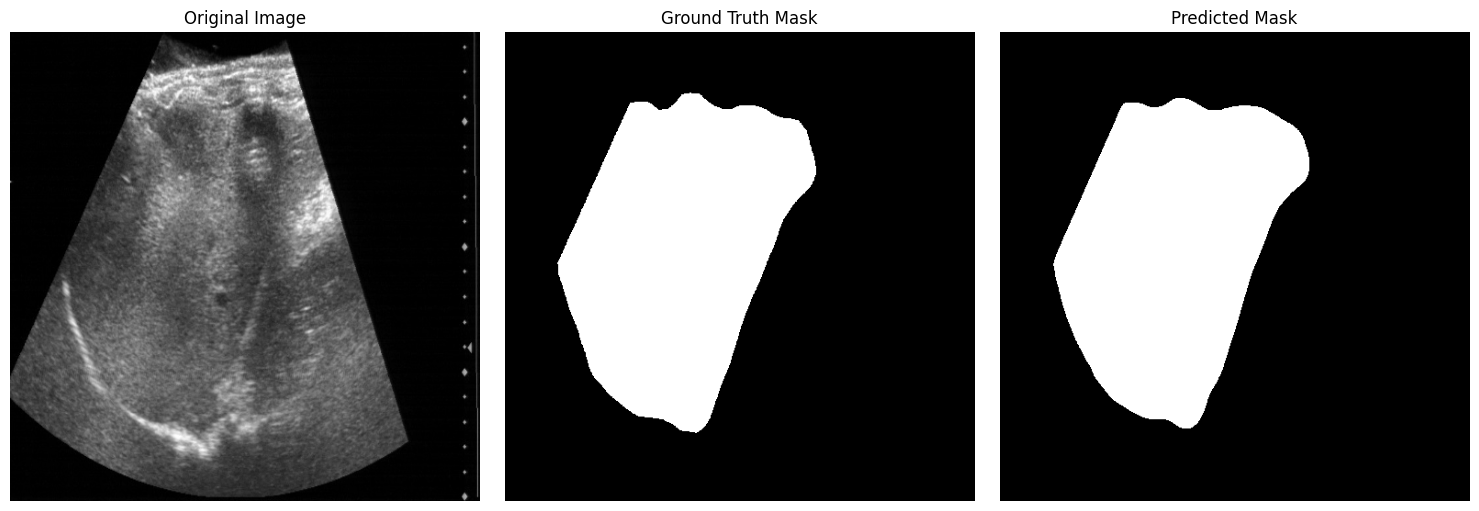

Accuracy: 0.9905
F1 Score: 0.9811


In [59]:
# Load and preprocess ona test image, instead of a training image

image_path = "/content/dataset/test/Images/scene00032.jpeg"  # Replace with your actual image path
mask_path = "/content/dataset/test/masks/scene00032.jpeg" # Replace with your actual mask path



original_image, preprocessed_image = load_and_preprocess_image(image_path)
ground_truth_mask = load_ground_truth_mask(mask_path)

# Add a batch dimension for model prediction
preprocessed_image_batch = np.expand_dims(preprocessed_image, axis=0)

print(f"Preprocessed image shape: {preprocessed_image_batch.shape}")

# Make prediction
predicted_mask = model.predict(preprocessed_image_batch)

# Ensure the predicted mask is binary
predicted_mask_binary = (predicted_mask > 0.5).astype(np.uint8)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(ground_truth_mask, cmap='gray')
axes[1].set_title('Ground Truth Mask')
axes[1].axis('off')

axes[2].imshow(predicted_mask_binary[0, :, :, 0], cmap='gray')
axes[2].set_title('Predicted Mask')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Calculate and print metrics
predicted_flat = predicted_mask_binary[0, :, :, 0].flatten()
ground_truth_flat = ground_truth_mask.flatten()

accuracy = accuracy_score(ground_truth_flat, predicted_flat)
f1 = f1_score(ground_truth_flat, predicted_flat)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")